Please upload the image file:


Saving ChatGPT Image Apr 11, 2025, 03_45_05 AM.png to ChatGPT Image Apr 11, 2025, 03_45_05 AM (4).png
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1  1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
Enter stride: 1
Enter padding: 0


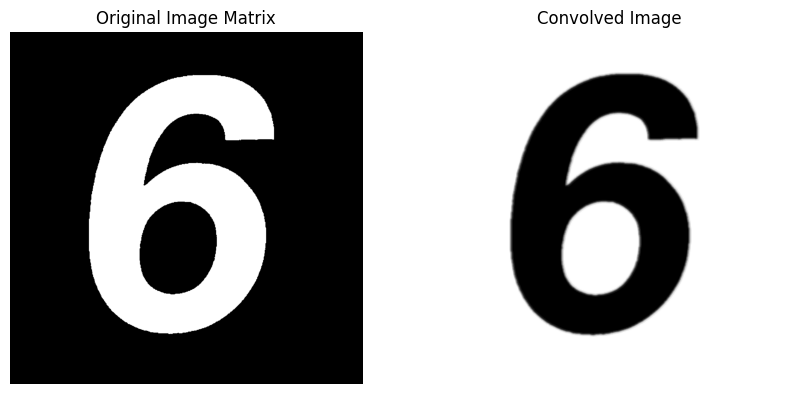

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def conv2d(input_matrix, kernel, stride, padding):
    """
    Performs a 2D convolution on an input matrix with a given kernel, stride, and padding.
    """
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = (input_height + 2 * padding - kernel_height) // stride + 1
    output_width = (input_width + 2 * padding - kernel_width) // stride + 1

    # Pad the input matrix
    padded_matrix = np.pad(input_matrix, padding, mode='constant')

    # Initialize the output matrix
    output_matrix = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            roi = padded_matrix[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]
            output_matrix[i, j] = np.sum(roi * kernel)

    return output_matrix

# Step 1: Upload Image
print("Please upload the image file:")
uploaded = files.upload()

# Step 2: Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]
image_path = f"/content/{image_filename}"

# Step 3: Load the image in grayscale
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 4: Check if the image was loaded correctly
if input_image is None:
    raise FileNotFoundError(f"Error: The image at {image_path} could not be loaded. Check the file path.")

# Step 5: Convert image to binary matrix (White=1, Black=-1)
input_matrix = np.where(input_image > 128, 1, -1)

# Step 6: Create a 10x10 kernel with "C" pattern (Background=-1, 'C' = 1)
kernel = np.full((10, 10), -1)  # Initialize with -1 (Background)
kernel[1:-1, 1] = 1             # Left vertical line of "C"
kernel[1, 1:9] = 1              # Top horizontal line
kernel[8, 1:9] = 1              # Bottom horizontal line


print(kernel)
# Step 7: Get stride and padding from the user
stride = int(input("Enter stride: "))
padding = int(input("Enter padding: "))

# Step 8: Perform convolution
output_matrix = conv2d(input_matrix, kernel, stride, padding)

# Step 9: Normalize the output for display
output_normalized = (output_matrix - np.min(output_matrix)) / (np.max(output_matrix) - np.min(output_matrix)) * 255
output_normalized = output_normalized.astype(np.uint8) # Converted to an 8-bit unsigned integer

# Step 10: Show the original and convolved images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_matrix, cmap='gray')
plt.title("Original Image Matrix")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_normalized, cmap='gray')
plt.title("Convolved Image")
plt.axis("off")

plt.show()


